<a href="https://colab.research.google.com/github/ridwanulhoquejr/The-Spark-Foundation-Internship/blob/main/Predict_the_optimal_number_of_clusters_and_represent_it_visually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation GRIP-Data Science and Business Analytics Intern 🚀

---

**Name : Ridwanul Hoque** 👶

### **Task 02: Predict the optimal number of clusters and represent it visually** 🔰

1.   **Importing the necessary libraries**
2.   **Load The Data & making the DataFrame**
3.   **Exploratory Data Analysis**
4.   **Scale the Data**
5.   **Find the Optimal number of K (Elbow method)**
6.   **Plotting clusters with centroides**

In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

In [2]:
# Load the dataset
iris = datasets.load_iris()


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Make DataFrame from the loaded data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Preview of Data
  - There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
  - There are no null values, so we don't have to worry about that.
  - There are 50 observations of each species (setosa, versicolor, virginica).

In [6]:
df['target'] = iris.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- **Relationship between Sepal length and Sepal width**

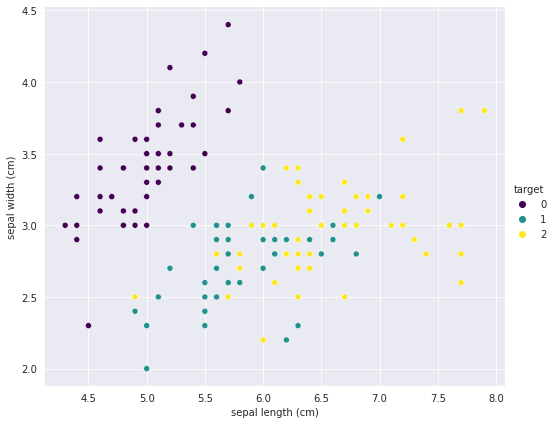

In [14]:
sns.relplot(x=df['sepal length (cm)'], 
            y=df['sepal width (cm)'],  
            hue=df.target, 
            data=df, 
            palette= "viridis", 
            height=6, 
            aspect=1.2 )

- **Relationship between Sepal length and Sepal width**

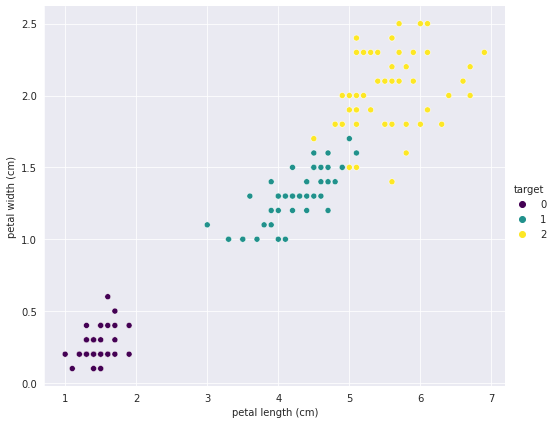

In [15]:
sns.relplot(x=df['petal length (cm)'], 
            y=df['petal width (cm)'],  
            hue=df.target, data=df, 
            palette= "viridis", 
            height=6, 
            aspect=1.2 )

- **Scalling the data to have all the datapoints equal importance**

In [ ]:
sc = StandardScaler()
df_norm = sc.fit_transform(df)

- **Finding the optimal numbers of K**

In [19]:
numOfK = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in numOfK]
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]
score = np.array(- score)
score

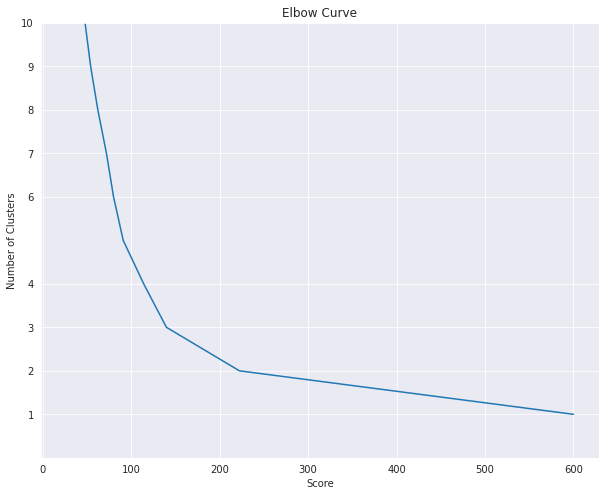

In [64]:
plt.figure(figsize=(10,8))
plt.plot(score, numOfK)
plt.xlabel('Score')
plt.ylabel('Number of Clusters')
plt.ylim(0,10)
plt.yticks([1, 2, 3, 4, 6, 7, 8, 9, 10])
plt.title('Elbow Curve')
plt.show()

- **Visualizing clusters with centroieds**

In [48]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = df_norm
y_kmeans = kmeans.fit_predict(x)

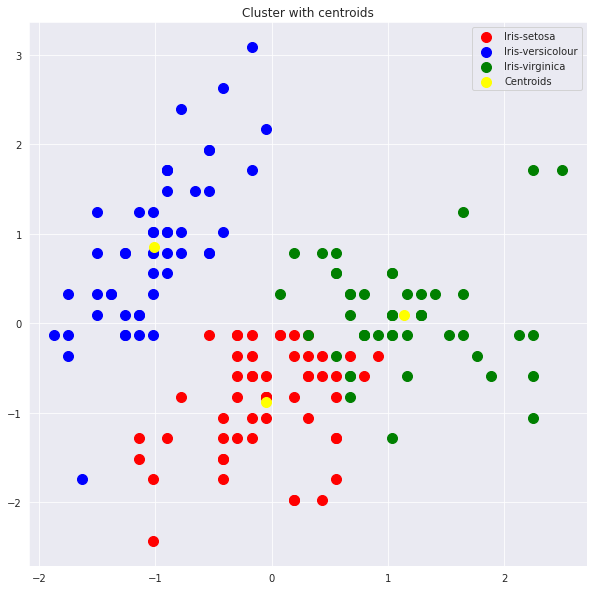

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Cluster with centroids')
plt.legend();